In [16]:
###··· RING DATASET ···### 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

# Part 1: Selecting and analyzing the dataset
    #Load the dataset
ring_merged = pd.read_csv("A2-ring\A2-ring-merged.txt", sep='\t', header=None)
ring_merged.columns = ["X", "Y", "Result"]
# Select the first two columns

x_m = ring_merged[["X", "Y"]]
y_m = ring_merged[["Result"]]

ring_test = pd.read_csv("A2-ring\A2-ring-test.txt", sep='\t', header=None)
ring_test.columns = ["X", "Y", "Result"]
x_t = ring_test[["X", "Y"]]
y_t = ring_test[["Result"]]

# Scale the dat
scaler = MinMaxScaler()
x_m_scaled = scaler.fit_transform(x_m)
y_m_scaled = scaler.fit_transform(y_m)
x_t_scaled = scaler.fit_transform(x_t)
y_t_scaled = scaler.fit_transform(y_t)

In [18]:
# Part 2: Implementation of NN
from tensorflow import keras as keras
from matplotlib import pyplot as plt

model = keras.models.Sequential([
    keras.layers.Dense(4, input_shape=(x_m_scaled.shape[1],) ,activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.5)
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'],optimizer=optimizer)
history = model.fit(x_m_scaled, y_m_scaled, epochs=100, validation_data=(x_t_scaled, y_t_scaled), verbose=0)

# Plot training & validation loss values
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

TypeError: Invalid keyword argument(s) in `compile()`: ({'verbose'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

10/10 [==============================] - 0s 2ms/step
---Test---
R2 Score:  0.8146052962717663
MSE:  0.008014937291061803
MAE:  0.06362548619789671
---Train---
R2 Score:  0.8760771894026358
MSE:  0.005266709980404034
MAE:  0.054132089225153224

MAPE:  0.1895936174133394


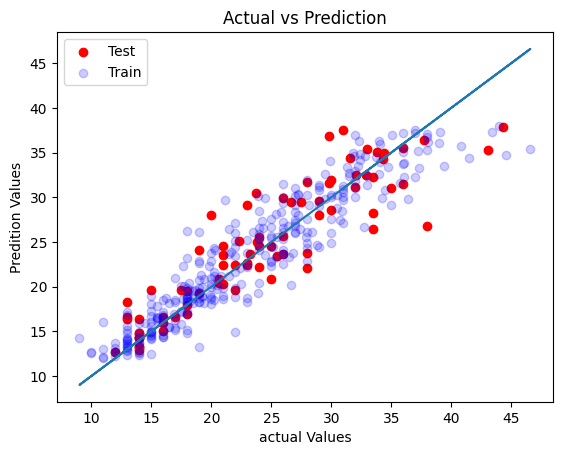

In [3]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y)
plt.legend()
plt.show()
